
*   Mohadese Ghayoomi Javinani 
*   Priyamvada Bhardwaj
*   Snigdha Mohapatra





# TASK 1: REWRITE MLP CODE FOR KERAS


## STEP 1: Import Libraries

In [ ]:
#%tensorflow_version 2.x  # Colab...

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## STEP 2: Load Data, Preprocess Data and Plot Image 

train_labels is : 5


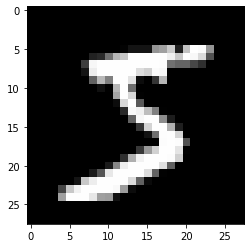

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


print('train_labels is :',train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")




data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 784]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 784]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

## STEP 3: TRAIN MODEL

In [ ]:
train_steps = 2500

n_h = 256
layer_list = [keras.layers.Dense(n_h, activation=tf.nn.relu),
              keras.layers.Dense(n_h//2, activation=tf.nn.relu),
              keras.layers.Dense(10)]  # default is no activation
model = keras.Sequential(layer_list)

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = keras.optimizers.SGD(0.5)
# from_logits = True!! #neverforget
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=opt, loss=loss_fn)

In [ ]:
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
# using a “custom” training loop (with GradientTape)
for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()
    

Loss: 2.320890426635742 Accuracy: 0.140625
Loss: 0.476533979177475 Accuracy: 0.7586718797683716
Loss: 0.30917730927467346 Accuracy: 0.9178906083106995
Loss: 0.22942441701889038 Accuracy: 0.9370312690734863
Loss: 0.130753293633461 Accuracy: 0.950390636920929
Loss: 0.0630917102098465 Accuracy: 0.9584116339683533
Loss: 0.07133293896913528 Accuracy: 0.9632031321525574
Loss: 0.18070919811725616 Accuracy: 0.9649999737739563
Loss: 0.07407441735267639 Accuracy: 0.9700000286102295
Loss: 0.08227121084928513 Accuracy: 0.96875
Loss: 0.07175333052873611 Accuracy: 0.974467396736145
Loss: 0.08436796069145203 Accuracy: 0.9783594012260437
Loss: 0.06225999444723129 Accuracy: 0.9771875143051147
Loss: 0.08773196488618851 Accuracy: 0.9789843559265137
Loss: 0.10649827122688293 Accuracy: 0.9779687523841858
Loss: 0.02219044789671898 Accuracy: 0.9835526347160339
Loss: 0.07981713861227036 Accuracy: 0.9830468893051147
Loss: 0.08738430589437485 Accuracy: 0.9849218726158142
Loss: 0.036525145173072815 Accuracy: 0.9

## STEP 4: TEST ACCURACY

In [ ]:
# this is very convenient -- before, we usually had code that
# evaluates the whole test set at once -- this won't work for
# large datasets/models. With metrics, we can just iterate
# over the data and the metric takes care of averaging etc.

test_acc_metric = keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9768999814987183


# TASK 2: CNN FOR MNIST

##STEP 1: IMPORT DATASET FILE

In [ ]:
from google.colab import drive; drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

##STEP 2: IMPORT LIBRARIES

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
from datasets import MNISTDataset
tf.__version__

'2.3.0'

##STEP 3: LOAD DATASET AND PLOT IMAGE

Training Image size:
(60000, 28, 28)
Test Image size:
(10000, 28, 28)


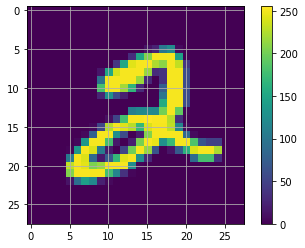

In [ ]:
# loads mnist dataset into mnist
#splits dataset into training and testing images and training and testing labels
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Plot train_image[24]
#plt.imshow(train_images[4], cmap="Pastel1",interpolation='spline36')

class_names = ['zero', 'one', 'two', 'three', 'four', 'five','six', 'seven', 'eight', 'nine']

print("Training Image size:")
print(train_images.shape)
print("Test Image size:")
print(test_images.shape)

## plot image
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(True)
plt.show()

## STEP 4: PREPROCESS THE DATA

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### DISPLAY FIRST 25 IMAGES FROM TRAINING IMAGES WITH CLASS NAME

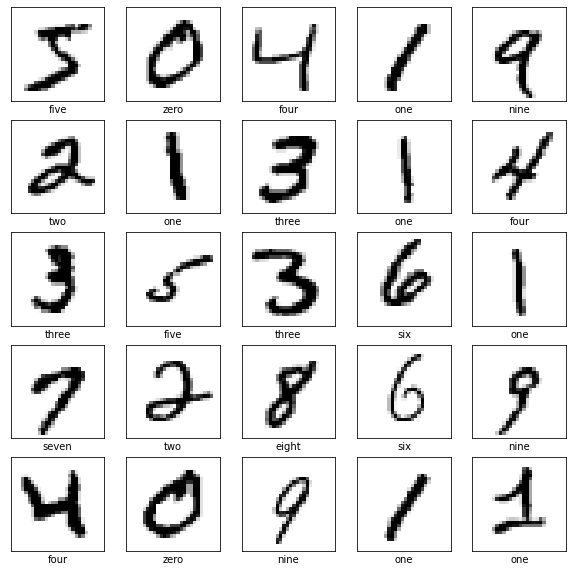

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## STEP 5: BUILD THE MODEL: SETTING UP LAYERS

CNN Architecture:


1.   Apply filters or feature detectors to the input image to generate the feature maps or the activation maps using the Relu activation function
2.   Pooling is then applied over the feature maps for invariance to translation. Pooling is based on the concept that when we change the input by a small amount, the pooled outputs do not change. 

1.   Flatten all the input and pass these flattened inputs to a deep neural network that outputs the class of the object






### CREATE CONVOLUTIONAL BASE

In [ ]:
train_images_data = train_images.reshape(60000,28,28,1)
test_images_data = test_images.reshape(10000,28,28,1)

filters(dimensions of kernel): 
Determeine the number of kernel to convolve with the inpute value(32)and each of these operations produces a 2D activation map.

Initial layers of a convolutional network extract high-level features from the image, so use fewer filters.(https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c)


*   layers early which is closer to the actual input image learn fewer convolutional filters 

*   layers deeper in the network (closer to the output predictions) will learn more filters.
*   The kernel_size/filtersize must be an odd integer as well

*   Filters of the deeper layers learn more features but are computationally very intensive.

*   If  input images are greater than 128×128 use a kernel size > 3 to help 
                     
>  1.   learn larger spatial filters 

> 2.   reduce volume size.














In [ ]:
model = models.Sequential()
#filters: determeine the number of kernel to convolve with the inpute value(32)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=( 28, 28, 1)))
# pooling: reduce spatial dimensions of volume 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

--Pooling is based on the concept that when we change the input by a small amount, the pooled outputs do not change(max pooling provides better performance compared to min or average pooling.)

--replacing pooling layers with strided convolutions can increase accuracy in some situations(https://arxiv.org/abs/1412.6806)

reduce spatial dimensions of volume by:



*   Max pooling
*   Strided convolution




In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)         73856     
Total params: 92,672
Trainable params: 92,672
Non-trainable params: 0
_________________________________________________________________


### ADD DENSE LAYERS

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(28, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 28)              

### ADD COMPILER

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


##TRAIN MODEL

In [ ]:
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1481 - accuracy: 0.9547 - val_loss: 0.0385 - val_accuracy: 0.9882
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0333 - val_accuracy: 0.9891
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0350 - val_accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0305 - val_accuracy: 0.9907
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0200 - accuracy: 0.9930 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0312 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0291 -

### EVALUATE ACCURACY

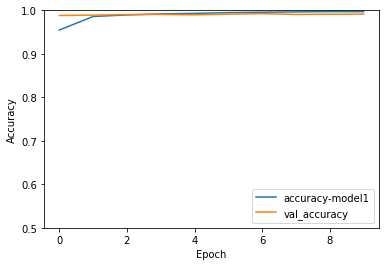

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy-model1')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [ ]:
test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)

313/313 - 3s - loss: 0.0344 - accuracy: 0.9914


In [ ]:
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.9914000034332275

Test loss: 0.03437378630042076


## STEP 7: MAKE PREDICTIONS



In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images_data)

In [ ]:
predictions[6]

array([5.8356376e-14, 2.2508892e-11, 1.7268614e-10, 1.2252375e-15,
       9.9999821e-01, 2.3137804e-11, 3.5150712e-14, 9.4903001e-09,
       2.1199131e-08, 1.7453370e-06], dtype=float32)

In [ ]:
test_labels[6]

4

## STEP 8: VERIFY PREDICITIONS





In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

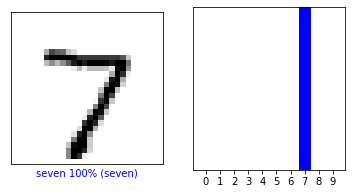

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

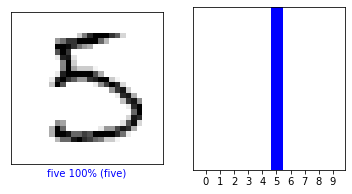

In [ ]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

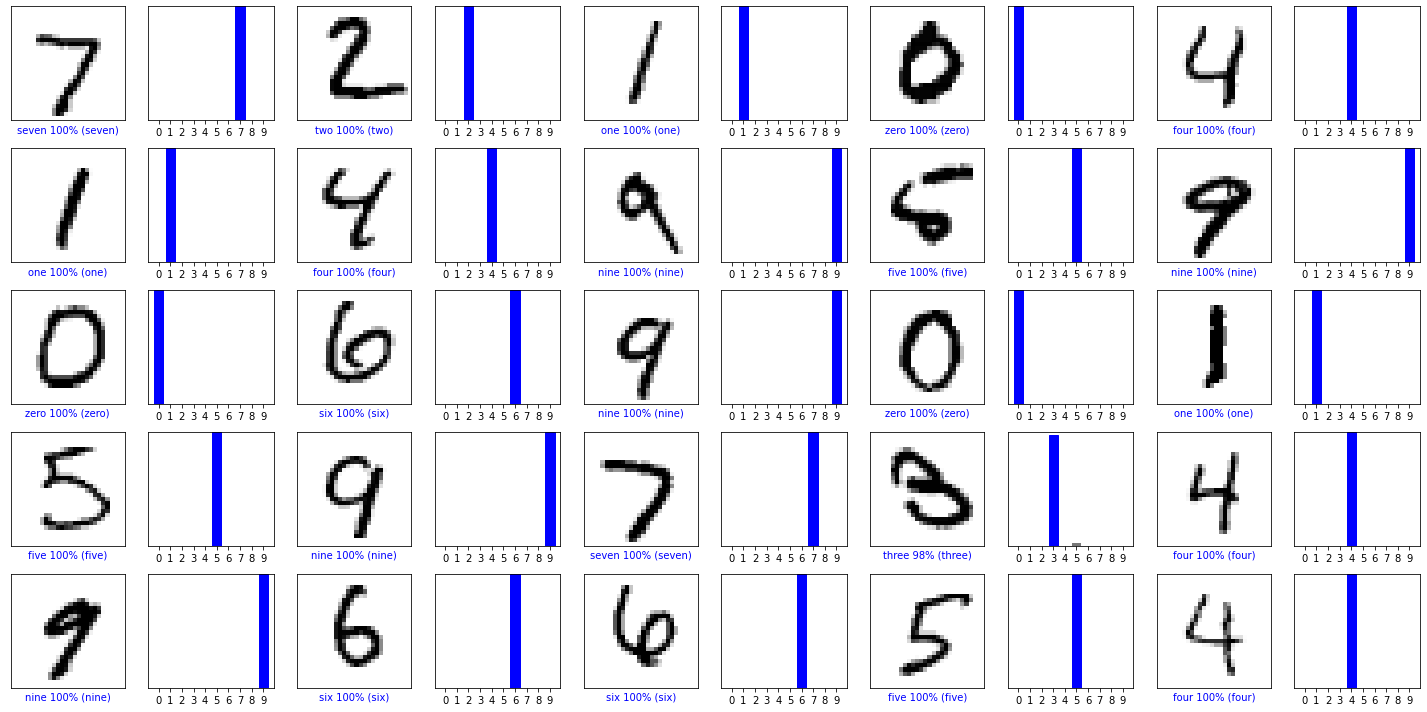

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# second model with fewer convolutional filters in early layer (the accuracy is lower than the first model)
model = models.Sequential()
model.add(layers.Conv2D(56, (3, 3), activation='relu', input_shape=( 28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(28, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(28, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 56)        560       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 56)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 28)        14140     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 28)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 28)          7084      
Total params: 21,784
Trainable params: 21,784
Non-trainable params: 0
_________________________________________________________________


### ADD DENSE LAYERS

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(28, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 56)        560       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 56)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 28)        14140     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 28)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 28)          7084      
_________________________________________________________________
flatten_7 (Flatten)          (None, 252)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 28)              

### ADD COMPILER

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


##STEP 6: TRAIN MODEL

In [ ]:
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1844 - accuracy: 0.9429 - val_loss: 0.0556 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0390 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0341 - val_accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0309 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0271 -

### EVALUATE ACCURACY

313/313 - 3s - loss: 0.0408 - accuracy: 0.9885


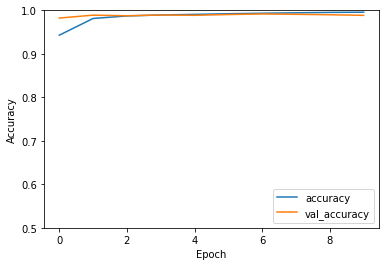

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)

In [ ]:
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.9884999990463257

Test loss: 0.040783897042274475


## STEP 7: MAKE PREDICTIONS




In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images_data)

In [ ]:
predictions[5]

array([2.3632270e-12, 9.9999917e-01, 3.8445941e-10, 1.2386509e-15,
       4.8333688e-11, 7.4306489e-10, 2.4429156e-10, 8.4724627e-07,
       3.2440157e-12, 2.3485577e-14], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

## STEP 8: VERIFY PREDICITIONS





In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

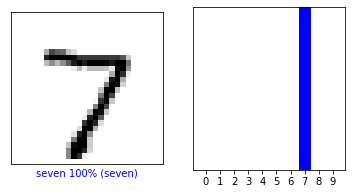

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

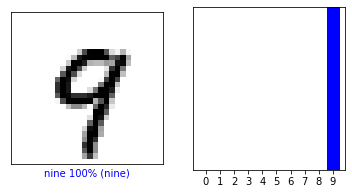

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

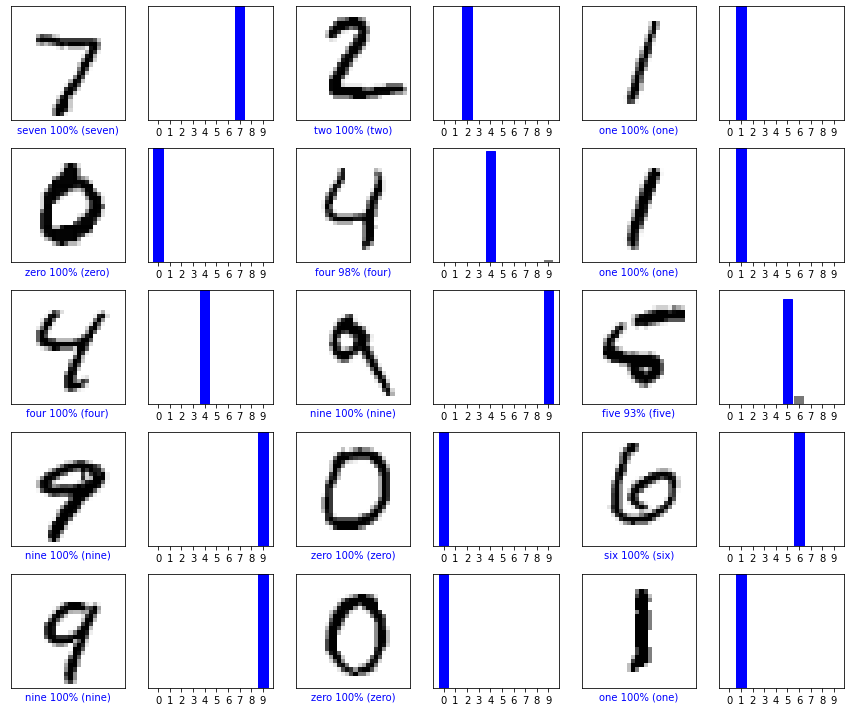

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## STEP 9:  USE TRAINED MODEL

In [ ]:
# Grab an image from the test dataset.(https://www.tensorflow.org/tutorials/keras/classification)
img = test_images[1]
img=img.reshape(28,28,1)
print(img.shape)

(28, 28, 1)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.6539848e-07 1.1298206e-06 9.9999726e-01 2.3599771e-14 2.6346031e-14
  3.4396160e-16 1.4898890e-06 2.8066289e-14 1.2242168e-09 1.4293452e-16]]


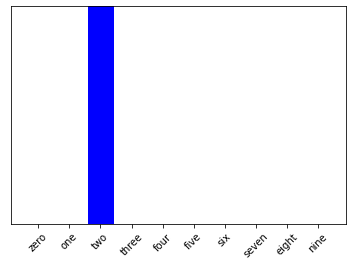

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [ ]:
np.argmax(predictions_single[0])

1

# TASK 3: CNN FOR CIFAR 

## STEP 1: IMPORT LIBRARIES

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import keras
from keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
tf.__version__

'2.3.0'

## STEP 2: LOAD DATASET AND PLOT IMAGE

Training Image size:
(50000, 32, 32, 3)
Test Image size:
(10000, 32, 32, 3)


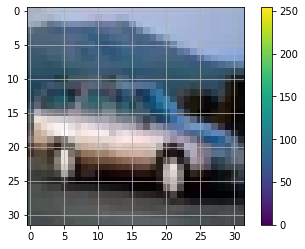

In [33]:
# loads cifar dataset into cifar
#splits dataset into training and testing images and training and testing labels
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Plot train_image[24]
#plt.imshow(train_images[4], cmap="Pastel1",interpolation='spline36')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']


print("Training Image size:")
print(train_images.shape)
print("Test Image size:")
print(test_images.shape)

## plot image
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(True)
plt.show()

In [13]:
train_labels.shape

(50000, 1)

In [14]:
test_labels.shape

(10000, 1)

## STEP 3: PREPROCESS THE DATA

In [34]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### DISPLAY FIRST 25 IMAGES FROM TRAINING IMAGES WITH CLASS NAME

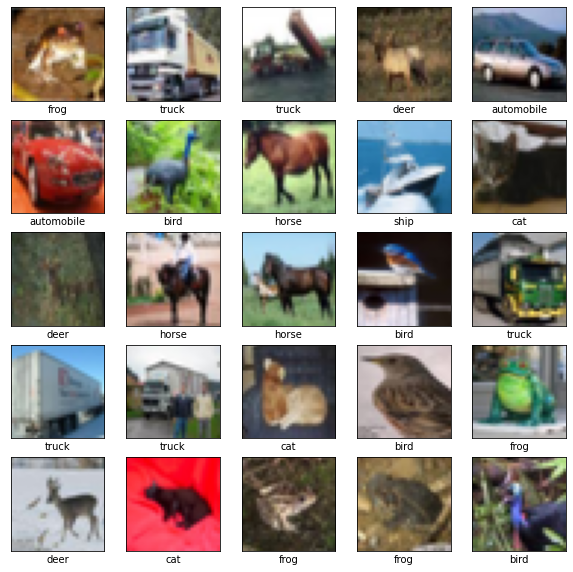

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [35]:
train_images_data = train_images.reshape(50000,32,32,3)
test_images_data = test_images.reshape(10000,32,32,3)

## STEP 4: BUILD THE MODEL

### SETTING UP LAYERS

# **EXPERIMENT 1**

In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(28, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_11 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 28)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5040 - accuracy: 0.4518 - val_loss: 1.2782 - val_accuracy: 0.5333
Epoch 2/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1028 - accuracy: 0.6018 - val_loss: 1.0077 - val_accuracy: 0.6412
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.9314 - accuracy: 0.6701 - val_loss: 0.9407 - val_accuracy: 0.6696
Epoch 4/10
1563/1563 [==============================] - 99s 64ms/step - loss: 0.8167 - accuracy: 0.7130 - val_loss: 0.8582 - val_accuracy: 0.7019
Epoch 5/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.7361 - accuracy: 0.7383 - val_loss: 0.8377 - val_accuracy: 0.7116
Epoch 6/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.6668 - accuracy: 0.7652 - val_loss: 0.8667 - val_accuracy: 0.7024
Epoch 7/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.6031 - accuracy: 0.7863 - val_loss: 0.

313/313 - 5s - loss: 0.8550 - accuracy: 0.7312


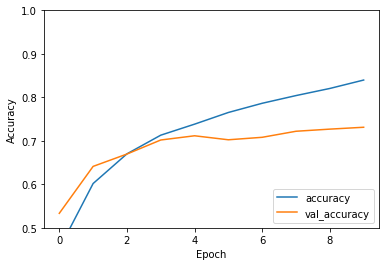

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)

In [ ]:
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.7311999797821045

Test loss: 0.8550141453742981


# **EXPERIMENT 1-2**

In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4637 - accuracy: 0.4724 - val_loss: 1.1767 - val_accuracy: 0.5798
Epoch 2/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.0280 - accuracy: 0.6416 - val_loss: 0.9411 - val_accuracy: 0.6709
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8570 - accuracy: 0.6999 - val_loss: 0.8737 - val_accuracy: 0.6950
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.7532 - accuracy: 0.7384 - val_loss: 0.8109 - val_accuracy: 0.7232
Epoch 5/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.6739 - accuracy: 0.7660 - val_loss: 0.8175 - val_accuracy: 0.7205
Epoch 6/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.6112 - accuracy: 0.7865 - val_loss: 0.8414 - val_accuracy: 0.7148
Epoch 7/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.5500 - accuracy: 0.8076 - val_loss: 0

313/313 - 5s - loss: 0.9570 - accuracy: 0.7205

Test accuracy: 0.7204999923706055

Test loss: 0.956967294216156


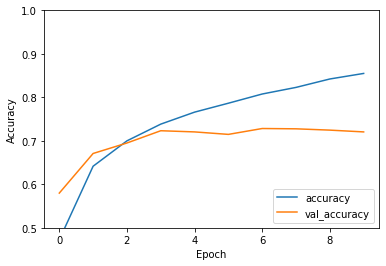

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 2**

In [ ]:
# filter (5*5)
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
flatten_13 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 32)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.5670 - accuracy: 0.4260 - val_loss: 1.3058 - val_accuracy: 0.5293
Epoch 2/10
1563/1563 [==============================] - 227s 145ms/step - loss: 1.1404 - accuracy: 0.5970 - val_loss: 1.0520 - val_accuracy: 0.6345
Epoch 3/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.9621 - accuracy: 0.6628 - val_loss: 0.9667 - val_accuracy: 0.6655
Epoch 4/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.8374 - accuracy: 0.7064 - val_loss: 0.9503 - val_accuracy: 0.6713
Epoch 5/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.7470 - accuracy: 0.7362 - val_loss: 0.9148 - val_accuracy: 0.6880
Epoch 6/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.6605 - accuracy: 0.7683 - val_loss: 0.9338 - val_accuracy: 0.6967
Epoch 7/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.5889 - accuracy: 0.7916 - val_

313/313 - 11s - loss: 1.1351 - accuracy: 0.6848

Test accuracy: 0.6848000288009644

Test loss: 1.1351385116577148


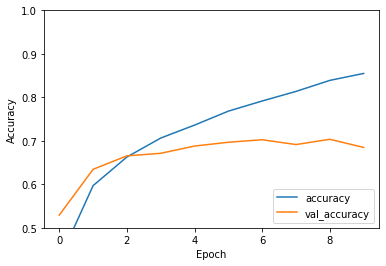

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 2-1**

In [ ]:
# filter (7*7)
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (7, 7),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 32)        4736      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        100416    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 8, 64)          200768    
_________________________________________________________________
flatten_14 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 405s 259ms/step - loss: 1.8290 - accuracy: 0.3103 - val_loss: 1.4695 - val_accuracy: 0.4733
Epoch 2/10
1563/1563 [==============================] - 403s 258ms/step - loss: 1.3351 - accuracy: 0.5192 - val_loss: 1.2655 - val_accuracy: 0.5423
Epoch 3/10
1563/1563 [==============================] - 408s 261ms/step - loss: 1.1525 - accuracy: 0.5854 - val_loss: 1.2338 - val_accuracy: 0.5675
Epoch 4/10
1563/1563 [==============================] - 406s 260ms/step - loss: 1.0218 - accuracy: 0.6378 - val_loss: 1.1160 - val_accuracy: 0.6111
Epoch 5/10
1563/1563 [==============================] - 403s 258ms/step - loss: 0.9125 - accuracy: 0.6740 - val_loss: 1.1372 - val_accuracy: 0.6083
Epoch 6/10
1563/1563 [==============================] - 401s 256ms/step - loss: 0.8113 - accuracy: 0.7100 - val_loss: 1.1526 - val_accuracy: 0.6237
Epoch 7/10
1563/1563 [==============================] - 402s 257ms/step - loss: 0.7151 - accuracy: 0.7448 - val_

313/313 - 19s - loss: 1.4091 - accuracy: 0.6115

Test accuracy: 0.6115000247955322

Test loss: 1.409057855606079


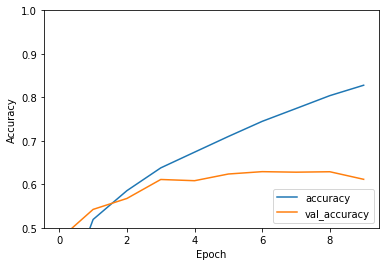

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 2-2**

In [ ]:
# filter (1*1)
model = models.Sequential()
model.add(layers.Conv2D(32, (1,1),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 64)        2112      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 8, 64)          4160      
_________________________________________________________________
flatten_16 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 32)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6433 - accuracy: 0.4093 - val_loss: 1.4516 - val_accuracy: 0.4777
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3980 - accuracy: 0.5001 - val_loss: 1.3335 - val_accuracy: 0.5218
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3217 - accuracy: 0.5298 - val_loss: 1.2933 - val_accuracy: 0.5429
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2688 - accuracy: 0.5507 - val_loss: 1.2645 - val_accuracy: 0.5548
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2298 - accuracy: 0.5663 - val_loss: 1.2660 - val_accuracy: 0.5533
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1980 - accuracy: 0.5796 - val_loss: 1.2690 - val_accuracy: 0.5555
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1688 - accuracy: 0.5877 - val_loss: 1.2412 -

313/313 - 2s - loss: 1.2063 - accuracy: 0.5741

Test accuracy: 0.5741000175476074

Test loss: 1.2062573432922363


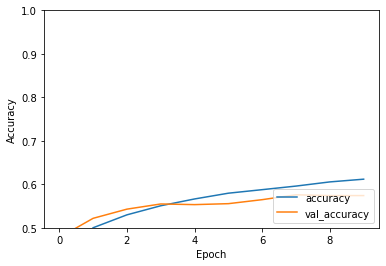

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 3**


1.   dropout 

At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed.

why dropout?(https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)
to prevent over-fitting

--A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which limits the individual power of each neuron leading to over-fitting of training data.(https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html)

In [ ]:
# with dropout , Descending filter (5-->3-->1)
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 8, 8, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 129s 83ms/step - loss: 1.5410 - accuracy: 0.4372 - val_loss: 1.3284 - val_accuracy: 0.5254
Epoch 2/10
1563/1563 [==============================] - 126s 81ms/step - loss: 1.1949 - accuracy: 0.5735 - val_loss: 1.1698 - val_accuracy: 0.6009
Epoch 3/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.0519 - accuracy: 0.6261 - val_loss: 1.0919 - val_accuracy: 0.6219
Epoch 4/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.9645 - accuracy: 0.6576 - val_loss: 1.0257 - val_accuracy: 0.6448
Epoch 5/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.9044 - accuracy: 0.6796 - val_loss: 1.0307 - val_accuracy: 0.6317
Epoch 6/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.8564 - accuracy: 0.6959 - val_loss: 0.9625 - val_accuracy: 0.6678
Epoch 7/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.8184 - accuracy: 0.7122 - val_loss: 0

313/313 - 6s - loss: 0.9559 - accuracy: 0.6669

Test accuracy: 0.6668999791145325

Test loss: 0.9559356570243835


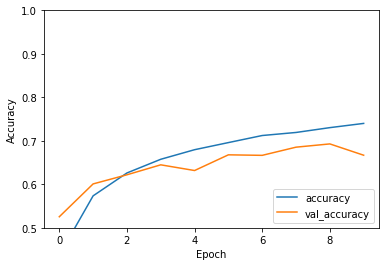

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 4**

In [ ]:
# Like previous cell ,but without dropout 
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 64)          4160      
_________________________________________________________________
flatten_18 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4726 - accuracy: 0.4696 - val_loss: 1.1928 - val_accuracy: 0.5742
Epoch 2/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0963 - accuracy: 0.6125 - val_loss: 1.0508 - val_accuracy: 0.6286
Epoch 3/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9438 - accuracy: 0.6662 - val_loss: 0.9475 - val_accuracy: 0.6691
Epoch 4/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.8443 - accuracy: 0.7049 - val_loss: 0.9236 - val_accuracy: 0.6800
Epoch 5/10
1563/1563 [==============================] - 101s 64ms/step - loss: 0.7752 - accuracy: 0.7296 - val_loss: 0.9554 - val_accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.7187 - accuracy: 0.7472 - val_loss: 0.9287 - val_accuracy: 0.6864
Epoch 7/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.6615 - accuracy: 0.7673 - val_loss: 0

# **EXPERIMENT 5**

In [ ]:
#Like previous Cell, but with Incremental filter
model = models.Sequential()
model.add(layers.Conv2D(32, (1,1),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5,5),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
flatten_19 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 32)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 135s 86ms/step - loss: 1.5369 - accuracy: 0.4418 - val_loss: 1.2709 - val_accuracy: 0.5361
Epoch 2/10
1563/1563 [==============================] - 132s 85ms/step - loss: 1.1622 - accuracy: 0.5874 - val_loss: 1.0954 - val_accuracy: 0.6146
Epoch 3/10
1563/1563 [==============================] - 135s 86ms/step - loss: 1.0085 - accuracy: 0.6445 - val_loss: 1.0096 - val_accuracy: 0.6402
Epoch 4/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.8990 - accuracy: 0.6835 - val_loss: 0.9916 - val_accuracy: 0.6493
Epoch 5/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.8145 - accuracy: 0.7142 - val_loss: 0.9622 - val_accuracy: 0.6731
Epoch 6/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.7481 - accuracy: 0.7383 - val_loss: 0.9224 - val_accuracy: 0.6888
Epoch 7/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.6826 - accuracy: 0.7621 - val_loss: 0

313/313 - 6s - loss: 1.0150 - accuracy: 0.6817

Test accuracy: 0.6816999912261963

Test loss: 1.0149970054626465


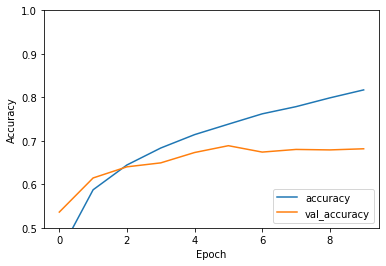

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 6**

In [ ]:
#filter (5,5)-->(5,5)-->(1,1)
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5),  padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 8, 8, 64)          4160      
_________________________________________________________________
flatten_20 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 32)              

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 176s 113ms/step - loss: 1.5177 - accuracy: 0.4513 - val_loss: 1.2323 - val_accuracy: 0.5561
Epoch 2/10
1563/1563 [==============================] - 175s 112ms/step - loss: 1.1319 - accuracy: 0.6004 - val_loss: 1.1092 - val_accuracy: 0.6147
Epoch 3/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.9623 - accuracy: 0.6647 - val_loss: 0.9667 - val_accuracy: 0.6612
Epoch 4/10
1563/1563 [==============================] - 177s 113ms/step - loss: 0.8561 - accuracy: 0.6999 - val_loss: 0.9174 - val_accuracy: 0.6824
Epoch 5/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.7738 - accuracy: 0.7288 - val_loss: 0.9957 - val_accuracy: 0.6627
Epoch 6/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.7104 - accuracy: 0.7518 - val_loss: 0.9087 - val_accuracy: 0.6912
Epoch 7/10
1563/1563 [==============================] - 177s 113ms/step - loss: 0.6485 - accuracy: 0.7726 - val_

313/313 - 9s - loss: 1.0280 - accuracy: 0.6874

Test accuracy: 0.6873999834060669

Test loss: 1.0280159711837769


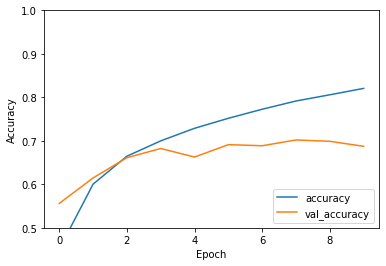

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 7**

In [ ]:
#Adding one new conv2D, alle filter size is (3,3) exept the last one 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 3, 3, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5207 - accuracy: 0.4444 - val_loss: 1.2590 - val_accuracy: 0.5512
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1432 - accuracy: 0.5951 - val_loss: 1.0702 - val_accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9860 - accuracy: 0.6526 - val_loss: 0.9854 - val_accuracy: 0.6588
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8878 - accuracy: 0.6873 - val_loss: 0.9553 - val_accuracy: 0.6691
Epoch 5/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.8144 - accuracy: 0.7162 - val_loss: 0.9156 - val_accuracy: 0.6832
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7587 - accuracy: 0.7331 - val_loss: 0.9144 - val_accuracy: 0.6872
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7099 - accuracy: 0.7532 - val_loss: 0.8772 -

313/313 - 4s - loss: 0.9078 - accuracy: 0.7028

Test accuracy: 0.7027999758720398

Test loss: 0.9077660441398621


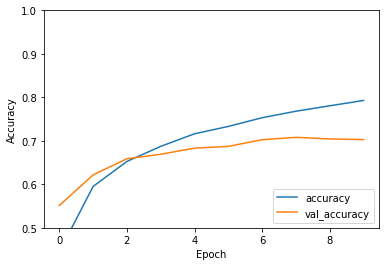

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 8**

In [ ]:
#Like previous cell, but the first filter size is changed-->(5,5)
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 3, 3, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6216 - accuracy: 0.4078 - val_loss: 1.3578 - val_accuracy: 0.5118
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2572 - accuracy: 0.5525 - val_loss: 1.1515 - val_accuracy: 0.5885
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1059 - accuracy: 0.6064 - val_loss: 1.0575 - val_accuracy: 0.6285
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0080 - accuracy: 0.6435 - val_loss: 1.0208 - val_accuracy: 0.6416
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9310 - accuracy: 0.6722 - val_loss: 0.9896 - val_accuracy: 0.6559
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8734 - accuracy: 0.6922 - val_loss: 0.9944 - val_accuracy: 0.6486
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8256 - accuracy: 0.7099 - val_loss: 0.9644 -

313/313 - 4s - loss: 0.8932 - accuracy: 0.6941

Test accuracy: 0.694100022315979

Test loss: 0.8931560516357422


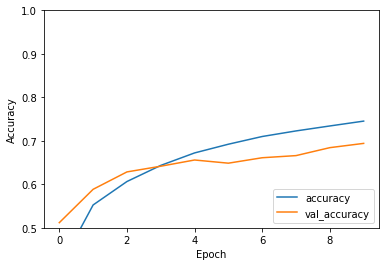

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 9**

In [ ]:
# like the previous cell,but I have changed the activation function in the first layer
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='softmax', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 3, 3, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.8454 - accuracy: 0.3217 - val_loss: 1.5561 - val_accuracy: 0.4312
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5045 - accuracy: 0.4587 - val_loss: 1.4138 - val_accuracy: 0.4907
Epoch 3/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.3938 - accuracy: 0.4992 - val_loss: 1.3491 - val_accuracy: 0.5225
Epoch 4/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.3142 - accuracy: 0.5283 - val_loss: 1.2969 - val_accuracy: 0.5361
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.2540 - accuracy: 0.5521 - val_loss: 1.2644 - val_accuracy: 0.5488
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.1941 - accuracy: 0.5748 - val_loss: 1.2184 - val_accuracy: 0.5721
Epoch 7/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.1484 - accuracy: 0.5892 - val_loss: 1.2416 -

313/313 - 5s - loss: 1.1419 - accuracy: 0.6070

Test accuracy: 0.6069999933242798

Test loss: 1.1419355869293213


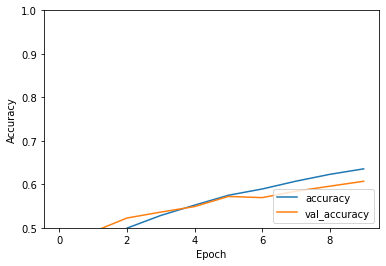

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 10**

In [ ]:
# Increasing the number of conv2D and Maxpooling2D layers
model = models.Sequential()
model.add(layers.Conv2D(32, (1,1), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 4, 4, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.7327 - accuracy: 0.3516 - val_loss: 1.4580 - val_accuracy: 0.4587
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3372 - accuracy: 0.5125 - val_loss: 1.2416 - val_accuracy: 0.5539
Epoch 3/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.1860 - accuracy: 0.5736 - val_loss: 1.1841 - val_accuracy: 0.5665
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0801 - accuracy: 0.6129 - val_loss: 1.0892 - val_accuracy: 0.6079
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0035 - accuracy: 0.6428 - val_loss: 1.0906 - val_accuracy: 0.6192
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9352 - accuracy: 0.6679 - val_loss: 1.0553 - val_accuracy: 0.6201
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8759 - accuracy: 0.6905 - val_loss: 1.0109 -

313/313 - 3s - loss: 1.0137 - accuracy: 0.6515

Test accuracy: 0.6514999866485596

Test loss: 1.013692021369934


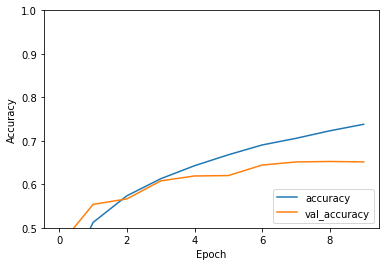

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 11**

In [ ]:
#like the previous cell, but the size of filters are changed to (1,1)
model = models.Sequential()
model.add(layers.Conv2D(32, (1,1), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (1,1),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1,1),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (1, 1),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 16, 16, 32)        1056      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 8, 8, 64)          2112      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 4, 4, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9086 - accuracy: 0.2801 - val_loss: 1.7272 - val_accuracy: 0.3644
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.6672 - accuracy: 0.3827 - val_loss: 1.6017 - val_accuracy: 0.3978
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5581 - accuracy: 0.4265 - val_loss: 1.5342 - val_accuracy: 0.4390
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4929 - accuracy: 0.4577 - val_loss: 1.4840 - val_accuracy: 0.4574
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4431 - accuracy: 0.4765 - val_loss: 1.4522 - val_accuracy: 0.4728
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.4048 - accuracy: 0.4894 - val_loss: 1.4079 - val_accuracy: 0.4854
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3736 - accuracy: 0.5040 - val_loss: 1.3955 -

313/313 - 2s - loss: 1.3556 - accuracy: 0.5119

Test accuracy: 0.511900007724762

Test loss: 1.3555773496627808


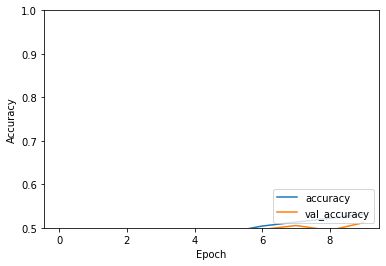

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 12**

In [ ]:
#Like the previuos cell, but the size of filters are changed 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5,5),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (9,9), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 3, 3, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6238 - accuracy: 0.3884 - val_loss: 1.3864 - val_accuracy: 0.4855
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2034 - accuracy: 0.5601 - val_loss: 1.0855 - val_accuracy: 0.6097
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.9935 - accuracy: 0.6439 - val_loss: 0.9876 - val_accuracy: 0.6487
Epoch 4/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.8629 - accuracy: 0.6963 - val_loss: 0.9287 - val_accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 131s 84ms/step - loss: 0.7606 - accuracy: 0.7335 - val_loss: 0.8480 - val_accuracy: 0.7053
Epoch 6/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.6825 - accuracy: 0.7620 - val_loss: 0.8463 - val_accuracy: 0.7072
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.6169 - accuracy: 0.7855 - val_loss: 0

313/313 - 5s - loss: 0.9681 - accuracy: 0.7154

Test accuracy: 0.715399980545044

Test loss: 0.9681090712547302


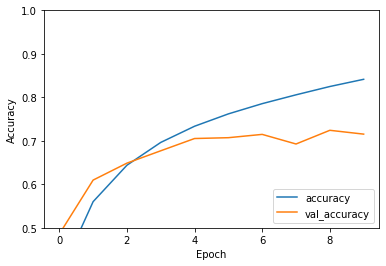

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 13**

In [ ]:
#just the filter-size of forth Conv2D layer is changed 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5,5),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (7, 7),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (9,9), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 3, 3, 64)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)


Epoch 1/10
1563/1563 [==============================] - 160s 102ms/step - loss: 1.6702 - accuracy: 0.3728 - val_loss: 1.3454 - val_accuracy: 0.4973
Epoch 2/10
1563/1563 [==============================] - 159s 102ms/step - loss: 1.2266 - accuracy: 0.5559 - val_loss: 1.1054 - val_accuracy: 0.6044
Epoch 3/10
1563/1563 [==============================] - 159s 102ms/step - loss: 1.0327 - accuracy: 0.6342 - val_loss: 1.0246 - val_accuracy: 0.6395
Epoch 4/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.8944 - accuracy: 0.6838 - val_loss: 0.9237 - val_accuracy: 0.6746
Epoch 5/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.7958 - accuracy: 0.7192 - val_loss: 0.8945 - val_accuracy: 0.6886
Epoch 6/10
1563/1563 [==============================] - 160s 103ms/step - loss: 0.7198 - accuracy: 0.7473 - val_loss: 0.8571 - val_accuracy: 0.7011
Epoch 7/10
1563/1563 [==============================] - 160s 103ms/step - loss: 0.6593 - accuracy: 0.7682 - val_

313/313 - 5s - loss: 0.8518 - accuracy: 0.7228

Test accuracy: 0.7228000164031982

Test loss: 0.8518002033233643


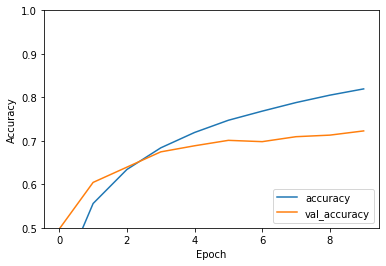

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **EXPERIMENT 14**

In [7]:

#just the filter-size of third conv2D layer is changed 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (7, 7),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (9,9), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          2

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.7098 - accuracy: 0.3560 - val_loss: 1.4249 - val_accuracy: 0.4753
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.3161 - accuracy: 0.5204 - val_loss: 1.2456 - val_accuracy: 0.5579
Epoch 3/10
1563/1563 [==============================] - 129s 82ms/step - loss: 1.1194 - accuracy: 0.5966 - val_loss: 1.0522 - val_accuracy: 0.6236
Epoch 4/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.9755 - accuracy: 0.6546 - val_loss: 0.9911 - val_accuracy: 0.6504
Epoch 5/10
1563/1563 [==============================] - 129s 83ms/step - loss: 0.8711 - accuracy: 0.6935 - val_loss: 0.9518 - val_accuracy: 0.6714
Epoch 6/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.7952 - accuracy: 0.7218 - val_loss: 0.8956 - val_accuracy: 0.6896
Epoch 7/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.7341 - accuracy: 0.7443 - val_loss: 0

313/313 - 4s - loss: 0.8466 - accuracy: 0.7168

Test accuracy: 0.7167999744415283

Test loss: 0.8465613126754761


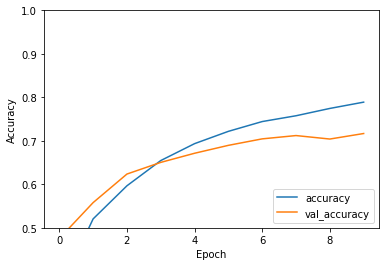

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **Experiment 15**

In [26]:
model =models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [27]:
opt = SGD (lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1563/1563 [==============================] - 373s 239ms/step - loss: 2.1849 - accuracy: 0.2708 - val_loss: 2.1034 - val_accuracy: 0.3553
Epoch 2/10
1563/1563 [==============================] - 374s 240ms/step - loss: 2.0930 - accuracy: 0.3643 - val_loss: 2.0646 - val_accuracy: 0.3968
Epoch 3/10
1563/1563 [==============================] - 375s 240ms/step - loss: 2.0588 - accuracy: 0.3983 - val_loss: 2.0447 - val_accuracy: 0.4110
Epoch 4/10
1563/1563 [==============================] - 375s 240ms/step - loss: 2.0331 - accuracy: 0.4265 - val_loss: 2.0161 - val_accuracy: 0.4420
Epoch 5/10
1563/1563 [==============================] - 378s 242ms/step - loss: 2.0107 - accuracy: 0.4492 - val_loss: 1.9983 - val_accuracy: 0.4604
Epoch 6/10
1563/1563 [==============================] - 376s 241ms/step - loss: 1.9914 - accuracy: 0.4680 - val_loss: 1.9842 - val_accuracy: 0.4747
Epoch 7/10
1563/1563 [==============================] - 378s 242ms/step - loss: 1.9731 - accuracy: 0.4871 - val_

313/313 - 17s - loss: 1.9172 - accuracy: 0.5445

Test accuracy: 0.5444999933242798

Test loss: 1.917220115661621


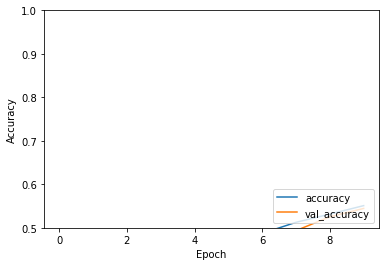

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

I use this resource(https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/). add more layers and different filter-size, but can not get high accuracy. But I get bad results

# **Experiment 16**

In [ ]:
#with dropout
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(Clayers.onv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
opt = SGD (lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1563/1563 [==============================] - 374s 239ms/step - loss: 2.1921 - accuracy: 0.2573 - val_loss: 2.1270 - val_accuracy: 0.3269
Epoch 2/10
1563/1563 [==============================] - 362s 232ms/step - loss: 2.0823 - accuracy: 0.3746 - val_loss: 2.0509 - val_accuracy: 0.4062
Epoch 3/10
1563/1563 [==============================] - 364s 233ms/step - loss: 2.0319 - accuracy: 0.4264 - val_loss: 1.9946 - val_accuracy: 0.4695
Epoch 4/10
1563/1563 [==============================] - 365s 233ms/step - loss: 1.9994 - accuracy: 0.4592 - val_loss: 1.9854 - val_accuracy: 0.4717
Epoch 5/10
1563/1563 [==============================] - 363s 232ms/step - loss: 1.9661 - accuracy: 0.4933 - val_loss: 1.9603 - val_accuracy: 0.5001
Epoch 6/10
1563/1563 [==============================] - 359s 230ms/step - loss: 1.9456 - accuracy: 0.5140 - val_loss: 1.9476 - val_accuracy: 0.5111
Epoch 7/10
1563/1563 [==============================] - 355s 227ms/step - loss: 1.9233 - accuracy: 0.5374 - val_

313/313 - 17s - loss: 1.9034 - accuracy: 0.5576

Test accuracy: 0.5576000213623047

Test loss: 1.9034230709075928


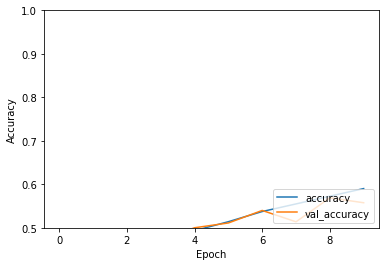

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **Experiment 17**

In [42]:
#with dropout
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [43]:
opt = SGD (lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1563/1563 [==============================] - 385s 246ms/step - loss: 2.2679 - accuracy: 0.1675 - val_loss: 2.2212 - val_accuracy: 0.2200
Epoch 2/10
1563/1563 [==============================] - 381s 244ms/step - loss: 2.2087 - accuracy: 0.2370 - val_loss: 2.1790 - val_accuracy: 0.2757
Epoch 3/10
1563/1563 [==============================] - 383s 245ms/step - loss: 2.1808 - accuracy: 0.2703 - val_loss: 2.1449 - val_accuracy: 0.3143
Epoch 4/10
1563/1563 [==============================] - 382s 244ms/step - loss: 2.1568 - accuracy: 0.2944 - val_loss: 2.1263 - val_accuracy: 0.3293
Epoch 5/10
1563/1563 [==============================] - 382s 245ms/step - loss: 2.1412 - accuracy: 0.3113 - val_loss: 2.1098 - val_accuracy: 0.3427
Epoch 6/10
1563/1563 [==============================] - 385s 246ms/step - loss: 2.1311 - accuracy: 0.3223 - val_loss: 2.1062 - val_accuracy: 0.3497
Epoch 7/10
1563/1563 [==============================] - 383s 245ms/step - loss: 2.1196 - accuracy: 0.3346 - val_

313/313 - 17s - loss: 2.0224 - accuracy: 0.4344

Test accuracy: 0.4343999922275543

Test loss: 2.0223588943481445


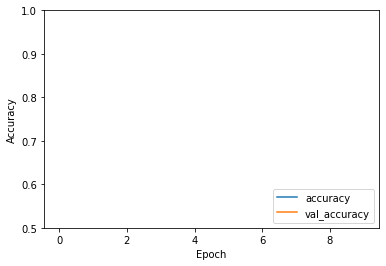

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **Experiment 18 : Variation of Dropout and Batch Normalization**

In [48]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [49]:
opt = SGD (lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1563/1563 [==============================] - 440s 281ms/step - loss: 2.1984 - accuracy: 0.2472 - val_loss: 2.0915 - val_accuracy: 0.3715
Epoch 2/10
1563/1563 [==============================] - 438s 280ms/step - loss: 2.0804 - accuracy: 0.3793 - val_loss: 2.0205 - val_accuracy: 0.4397
Epoch 3/10
1563/1563 [==============================] - 441s 282ms/step - loss: 2.0338 - accuracy: 0.4259 - val_loss: 1.9856 - val_accuracy: 0.4768
Epoch 4/10
1563/1563 [==============================] - 441s 282ms/step - loss: 2.0040 - accuracy: 0.4592 - val_loss: 1.9626 - val_accuracy: 0.5002
Epoch 5/10
1563/1563 [==============================] - 440s 282ms/step - loss: 1.9761 - accuracy: 0.4874 - val_loss: 1.9734 - val_accuracy: 0.4877
Epoch 6/10
1563/1563 [==============================] - 443s 284ms/step - loss: 1.9529 - accuracy: 0.5105 - val_loss: 1.9441 - val_accuracy: 0.5202
Epoch 7/10
1563/1563 [==============================] - 439s 281ms/step - loss: 1.9284 - accuracy: 0.5364 - val_

313/313 - 19s - loss: 1.9072 - accuracy: 0.5518

Test accuracy: 0.551800012588501

Test loss: 1.9072353839874268


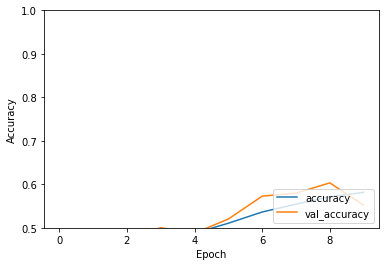

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **Experiment 16**

In [51]:
#Like the previous cell, just adding strides instead of pooling
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(2,2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Dropout(0.2))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3),strides=(2,2), padding='same', activation='relu'))
model.add(layers.Dropout(0.2))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3),strides=(2,2), padding='same', activation='relu'))
model.add(layers.Dropout(0.2))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (5, 5),strides=(2,2), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10 , activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_17 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
dropout_18 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 2, 2, 256)       

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images_data, train_labels,batch_size=None, epochs=10,validation_data=(test_images_data, test_labels),validation_steps=1, initial_epoch=0)

Epoch 1/10
1563/1563 [==============================] - 165s 105ms/step - loss: 2.0240 - accuracy: 0.2906 - val_loss: 1.9540 - val_accuracy: 0.3228
Epoch 2/10
1563/1563 [==============================] - 165s 105ms/step - loss: 1.9580 - accuracy: 0.3316 - val_loss: 1.9667 - val_accuracy: 0.3335
Epoch 3/10
1563/1563 [==============================] - 164s 105ms/step - loss: 2.1135 - accuracy: 0.2192 - val_loss: 2.2935 - val_accuracy: 0.1180
Epoch 4/10
1563/1563 [==============================] - 165s 105ms/step - loss: 2.3025 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 5/10
1563/1563 [==============================] - 164s 105ms/step - loss: 2.3104 - accuracy: 0.1004 - val_loss: 2.4257 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 165s 106ms/step - loss: 2.4183 - accuracy: 0.1001 - val_loss: 2.4169 - val_accuracy: 0.1011
Epoch 7/10
1563/1563 [==============================] - 163s 105ms/step - loss: 2.4182 - accuracy: 0.1000 - val_

313/313 - 4s - loss: 2.4183 - accuracy: 0.1000

Test accuracy: 0.10000000149011612

Test loss: 2.4183223247528076


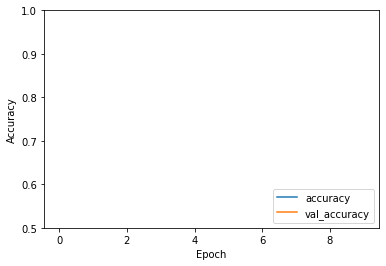

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# **summerize of Result**

1. Filter: 3 x 3- loss: 0.4531 - accuracy: 0.8398 - val_loss: 0.8550 - val_accuracy: 0.7312 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 28)
            1-2 Filter: 3 x 3- loss: 0.4531 - accuracy: 0.8398 - val_loss: 0.8550 - val_accuracy: 0.7312 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 32)
2. Filter: 5 x 5- loss: 0.4138 - accuracy: 0.8549 - val_loss: 1.1351 - val_accuracy: 0.6848 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 32)
            2.1. Filter: 7x 7- loss: 0.4864 - accuracy: 0.8278 - val_loss: 1.4091 - val_accuracy: 0.6115 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 32)
            2.2. Filter: 1 x 1- loss: 1.1063 - accuracy: 0.6118 - val_loss: 1.2063 - val_accuracy: 0.5741 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 32)
3. filter (5-->3-->1) and dropout (0.2)- loss: 0.7297 - accuracy: 0.7400 - val_loss: 0.9559 - val_accuracy: 0.6669 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 32)
4. filter (5-->3-->1)- loss: 0.5374 - accuracy: 0.8070 - val_loss: 0.9579 - val_accuracy: 0.6906 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 32)
5. filter (1-->3-->5)- loss: 0.5182 - accuracy: 0.8171 - val_loss: 1.0150 - val_accuracy: 0.6817 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 32)
6. filter (5-->5-->1)- loss: 0.5182 - accuracy: 0.5065 - val_loss: 1.8280 - val_accuracy: 0.6874 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 ,Dense 32)
7. filter (3-->3-->3-->1)- loss: 0.5866 - accuracy: 0.7928 - val_loss: 0.9078 - val_accuracy: 0.7028 (Conv2D 1- 32 Conv2D , Conv2D 2-64 and Conv2D 3-64 and Conv2D 4-64, Dense 32)
8. filter (5-->3-->3-->1)- loss: 0.7251 - accuracy: 0.7453 - val_loss: 0.8932 - val_accuracy: 0.6941 (Conv2D 1- 32 Conv2D , Conv2D 2-32 and Conv2D 3-64 and Conv2D 4-64, Dense 32)
9. filter (3-->3-->3-->1), activation -layer1:softmax- loss: 1.0311 - accuracy: 0.6355 - val_loss: 1.1419 - val_accuracy: 0.6070 (Conv2D 1- 32 Conv2D 2-32, Conv2D 3-64 and Conv2D 4-64 and Conv2D 3-64, Dense 32)
10. filter (1-->3-->3-->3-->3-- >3), - loss: 0.7419 - accuracy: 0.7380 - val_loss: 1.0137 - val_accuracy: 0.6515 (Conv2D 1- 32 Conv2D 2-32, Conv2D 3-64 and Conv2D 4-64 and Conv2D 5-64, Conv2D 6-64, Dense 32)
11. filter (1-->1-->1-->1-->3-- >3), - loss: 1.3047 - accuracy: 0.5316 - val_loss: 1.3556 - val_accuracy: 0.5119 (Conv2D 1- 32 Conv2D 2-32, Conv2D 3-64 and Conv2D 4-64 and Conv2D 5-64, Conv2D 6-64, Dense 32)
12. filter (3-->3-->5-->5-->9), - loss: 0.4527 - accuracy: 0.8415 - val_loss: 0.9681 - val_accuracy: 0.7154 (Conv2D 1- 32 Conv2D 2-32, Conv2D 3-64 and Conv2D 4-64 and Conv2D 5-64, Dense 32)
13. filter (3-->3-->5-->7-->9), - loss: 0.5152 - accuracy: 0.8194 - val_loss: 0.8518 - val_accuracy: 0.7228 (Conv2D 1- 32 Conv2D 2-32, Conv2D 3-64 and Conv2D 4-64 and Conv2D 5-64, Dense 32)
14. filter (3-->3-->3-->7-->9), - loss: 0.6010 - accuracy: 0.7889 - val_loss: 0.8466 - val_accuracy: 0.7168 (Conv2D 1- 32 Conv2D 2-32, Conv2D 3-64 and Conv2D 4-64 and Conv2D 5-64, Dense 32)
15. filter (3-->3-->3-->5), - loss: 0.6010 - accuracy: 0.7889 - val_loss: 0.8466 - val_accuracy: 0.7168 (Conv2D 1- 32 Conv2D 2-32, Conv2D 3-64 and Conv2D 4-64 and Conv2D 5-64, Dense 32)






